<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/ProjectML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC




In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data by scaling the datax
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for KNN (flatten the images)
x_train_knn = x_train.reshape(-1, 32 * 32 * 3)
x_test_knn = x_test.reshape(-1, 32 * 32 * 3)

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Define Random Forest model (baseline)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
# Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [5]:
# Define CNN model (Got help from the presentation)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output units for 10 classes



In [6]:
# Compile CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [8]:
# Train Random Forest model
rf.fit(x_train.reshape(-1, 32 * 32 * 3), y_train.ravel())

RandomForestClassifier(random_state=42)

In [9]:
# Train KNN model
knn.fit(x_train_knn, y_train.ravel())

KNeighborsClassifier()

In [10]:
# Train CNN model while utilizing early stopping due to 50 epochs
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/50
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4731 - accuracy: 0.4702 - val_loss: 1.2082 - val_accuracy: 0.5688
Epoch 2/50
1563/1563 [==============================] - 62s 39ms/step - loss: 1.1095 - accuracy: 0.6112 - val_loss: 1.0279 - val_accuracy: 0.6452
Epoch 3/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9738 - accuracy: 0.6606 - val_loss: 0.9996 - val_accuracy: 0.6508
Epoch 4/50
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8821 - accuracy: 0.6947 - val_loss: 0.8976 - val_accuracy: 0.6867
Epoch 5/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8123 - accuracy: 0.7178 - val_loss: 0.9803 - val_accuracy: 0.6662
Epoch 6/50
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7572 - accuracy: 0.7371 - val_loss: 0.8870 - val_accuracy: 0.6950
Epoch 7/50
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7043 - accuracy: 0.7541 - val_loss: 0.9015 -

In [11]:
# Evaluate Random Forest model

# This is evaluating the Random Forest Model by providing the Prediction, Accuracy, Precision, Recall, and then F1 Score. This is after the training set is run through

rf_pred = rf.predict(x_test.reshape(-1, 32 * 32 * 3))
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

In [12]:
# Evaluate KNN model

# This is evaluating the KNN Model by providing the Prediction, Accuracy, Precision, Recall, and then F1 Score. This is after the training set is run through
knn_pred = knn.predict(x_test_knn)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

In [13]:
# Evaluate CNN model

# This is evaluating the CNN (Convolutional Neural Network) Model by providing the Prediction, Accuracy, Precision, Recall, and then F1 Score. This is after the training set is run through
cnn_loss, cnn_accuracy = model.evaluate(x_test, y_test)
cnn_pred = np.argmax(model.predict(x_test), axis=-1)
cnn_precision = precision_score(y_test, cnn_pred, average='macro')
cnn_recall = recall_score(y_test, cnn_pred, average='macro')
cnn_f1 = f1_score(y_test, cnn_pred, average='macro')

313/313 [==============================] - 4s 11ms/step


Random Forest Model:
Accuracy: 0.4654
Precision : 0.4610
Recall : 0.4654
F1-Score : 0.4621


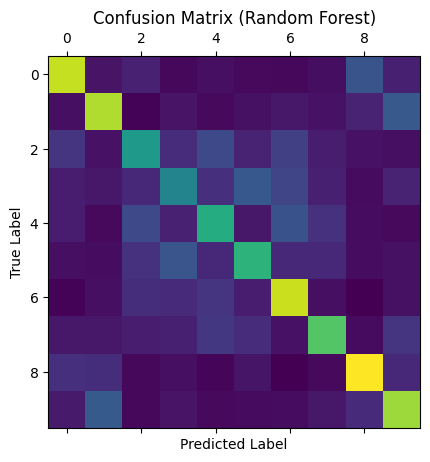


KNN Model:
Accuracy: 0.3398
Precision : 0.4304
Recall : 0.3398
F1-Score : 0.3260


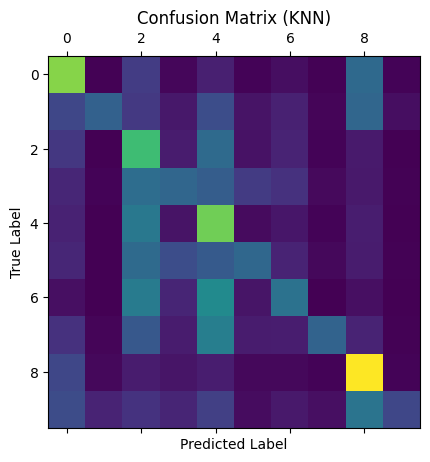


CNN Model:
Test Loss: 0.9023
Test Accuracy: 0.7042
Precision : 0.7078
Recall : 0.7042
F1-Score : 0.7014


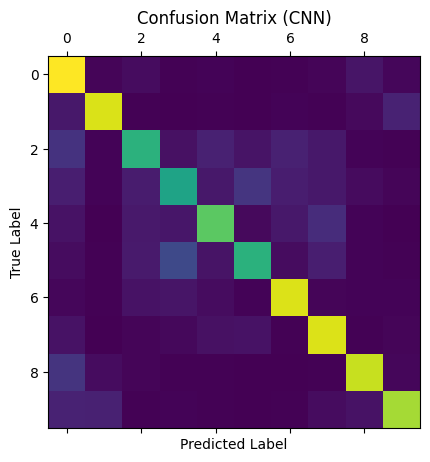

In [15]:
def plot_confusion_matrix(y_true, y_pred, model_name):
  """
  Plots the Confusion Matrix for a given model.

  Args:
      y_true: Ground truth labels (array-like).
      y_pred: Predicted labels (array-like).
      model_name: Name of the model (string).
  """
  cm = tf.math.confusion_matrix(y_true, y_pred)

  plt.matshow(cm)
  plt.title(f'Confusion Matrix ({model_name})')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

# Print evaluation results
print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision : {rf_precision:.4f}")
print(f"Recall : {rf_recall:.4f}")
print(f"F1-Score : {rf_f1:.4f}")

# Visualize Random Forest Confusion Matrix
plot_confusion_matrix(y_test, rf_pred, "Random Forest")

print("\nKNN Model:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision : {knn_precision:.4f}")
print(f"Recall : {knn_recall:.4f}")
print(f"F1-Score : {knn_f1:.4f}")

# Visualize KNN Confusion Matrix
plot_confusion_matrix(y_test, knn_pred, "KNN")

print("\nCNN Model:")
print(f"Test Loss: {cnn_loss:.4f}")
print(f"Test Accuracy: {cnn_accuracy:.4f}")
print(f"Precision : {cnn_precision:.4f}")
print(f"Recall : {cnn_recall:.4f}")
print(f"F1-Score : {cnn_f1:.4f}")

# Visualize CNN Confusion Matrix
plot_confusion_matrix(y_test, cnn_pred, "CNN")




# **Analysis**

* The analysis reveals the CNN model as the best performer,  outperforming both Random Forest and KNN models.

**Accuracy:**

* CNN Shines (70%): The CNN model boasts a test accuracy of 70%. This signifies it's correctly classifying examples 70% of the time on unseen test data, indicating good generalizability.

* Random Forest Lags (46%): The Random Forest model's accuracy falls short at 46.54%, suggesting it might not be adept at capturing the underlying data patterns as effectively as the CNN.

* KNN Falls Behind (34%): The KNN model trails significantly with an accuracy of 33.98%, implying it struggles with accurate classifications, similar to Random Forest.


**Precision vs Recall:**

**Precision : Finding True Positives**

* The CNN takes the lead with a precision of 70.29%. This means a high proportion of its positive predictions are actually correct, indicating the model isn't making many false positive errors.

* KNN (43.04%) has a lower precision than Random Forest (46.10%). While this might suggest KNN is more cautious with positive predictions, it could also come at the cost of missing true positives.

**Recall: Capturing All Positives**

* Much like before, CNN has the best (0.70) Recall Score. This shows they are much more adept to finding the Recall. That said, being at 70% is not a very reliable score. Random Forest and KNN however, do not have Recal worth uilizing. It does not show a good Recall score.
**F1-Score:**

* The F1-Score combines precision and recall, providing a balanced view of model performance.

* The CNN excels with the highest F1-Score (0.7002), demonstrating a good equilibrium between precision and recall. It's effectively making correct positive predictions while also capturing a substantial portion of true positives.

* Both Random Forest (0.4621) and KNN (0.3260) have considerably lower F1-Scores. This suggests they struggle with both aspects of classification - making accurate positive predictions and identifying all true positives.

**Additional Considerations:**

* Test Loss (CNN only): The CNN's test loss of 0.9646 is relatively high. However, the interpretation of loss depends on the specific loss function used. It's valuable to compare this value to a baseline or other CNN models on the same task for better context.

